In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [45]:
cases = pd.read_csv('ody.csv')

In [46]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cl           6516 non-null   object 
 1   ch           6516 non-null   object 
 2   name         6516 non-null   object 
 3   dob          6491 non-null   object 
 4   race         6516 non-null   object 
 5   zip          658 non-null    object 
 6   atty         3658 non-null   object 
 7   retained     3658 non-null   object 
 8   case_no      6516 non-null   int64  
 9   judge        6516 non-null   object 
 10  date         6516 non-null   object 
 11  type         6516 non-null   object 
 12  status       6234 non-null   object 
 13  bond_amt     6516 non-null   float64
 14  bond_status  6516 non-null   object 
 15  era          6516 non-null   float64
 16  log_bond     6516 non-null   float64
dtypes: float64(3), int64(1), object(13)
memory usage: 865.5+ KB


In [47]:
cases.notnull().sum().head(50)

cl             6516
ch             6516
name           6516
dob            6491
race           6516
zip             658
atty           3658
retained       3658
case_no        6516
judge          6516
date           6516
type           6516
status         6234
bond_amt       6516
bond_status    6516
era            6516
log_bond       6516
dtype: int64

In [48]:
bonds = cases[cases['bond_amt'] > 0]

In [49]:
ror = cases[cases['bond_amt'] == 0 ]

<Axes: xlabel='log_bond', ylabel='Proportion'>

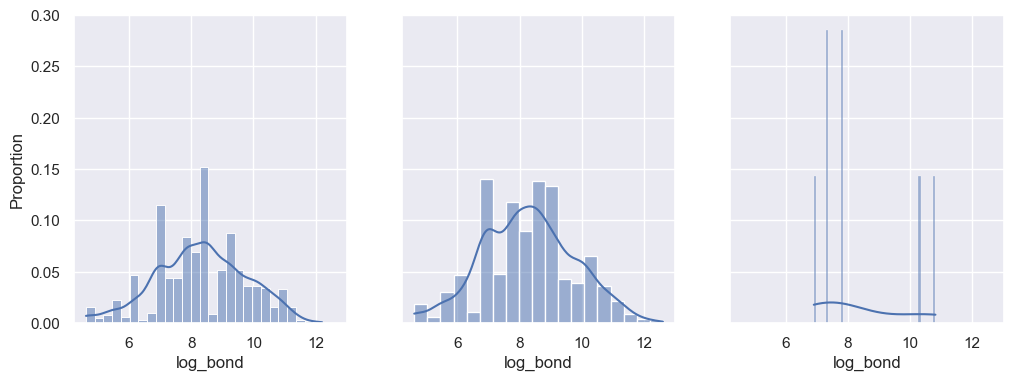

In [50]:
fig,axs = plt.subplots(1,3,figsize=(12,4),sharex = True,sharey=True)

sns.histplot(data = bonds[bonds['era'] == 0],
             x = 'log_bond',
             ax = axs[0],
             kde = True,
             stat = 'proportion')

sns.histplot(data = bonds[bonds['era'] == 1],
             x = 'log_bond',
             ax = axs[1],
             kde = True,
             stat = 'proportion')

sns.histplot(data = bonds[bonds['era'] == 2],
             x = 'log_bond',
             ax = axs[2],
             kde = True,
             stat = 'proportion',bins=50)

In [51]:
bonds['cl'].value_counts()

{'Misdemeanor A'}                                                              1228
{'Felony C'}                                                                    355
{'Felony E'}                                                                    281
{'Felony D'}                                                                    151
{'Felony E', 'Misdemeanor A'}                                                   136
                                                                               ... 
{'Misdemeanor B', 'Misdemeanor C', 'Felony B'}                                    1
{'Misdemeanor C', 'Felony B', 'Misdemeanor A'}                                    1
{'Felony E', 'Felony A', 'Misdemeanor A', 'Felony D'}                             1
{'Felony B', 'Felony D', 'Misdemeanor A', 'Misdemeanor B', 'Misdemeanor C'}       1
{'Felony E', 'Misdemeanor B', 'Felony C', 'Misdemeanor C'}                        1
Name: cl, Length: 150, dtype: int64

In [52]:
bonds.groupby('cl')['bond_amt'].describe()

,count,mean,std,min,25%,50%,75%,max
cl,,,,,,,,
"{'Felony A', 'Felony C', 'Misdemeanor A'}",1.0,200.000000,NaN,200.0,200.0,200.0,200.0,200.0
"{'Felony A', 'Felony D'}",5.0,37200.000000,35555.590278,1000.0,10000.0,25000.0,75000.0,75000.0
"{'Felony A', 'Felony E', 'Misdemeanor A'}",1.0,250.000000,NaN,250.0,250.0,250.0,250.0,250.0
"{'Felony A', 'Misdemeanor A', 'Felony D'}",1.0,5000.000000,NaN,5000.0,5000.0,5000.0,5000.0,5000.0
"{'Felony A', 'Misdemeanor A'}",9.0,15500.000000,14958.275302,3500.0,5000.0,10000.0,20000.0,50000.0
...,...,...,...,...,...,...,...,...
"{'Misdemeanor C', 'Felony B', 'Misdemeanor A'}",1.0,15000.000000,NaN,15000.0,15000.0,15000.0,15000.0,15000.0
"{'Misdemeanor C', 'Felony D'}",5.0,7300.000000,7120.393248,1000.0,1500.0,4000.0,15000.0,15000.0
"{'Misdemeanor C', 'Misdemeanor A', 'Felony D'}",7.0,3642.857143,3590.662494,1000.0,1500.0,1500.0,5000.0,10000.0


In [53]:
ror['cl'].value_counts()

{'Misdemeanor A'}                                             1017
{'Felony C'}                                                   318
{'Felony E'}                                                   230
{'Felony D'}                                                   123
{'Misdemeanor C'}                                              113
                                                              ... 
{'Felony C', 'Felony B', 'Misdemeanor C'}                        1
{'Felony E', 'Felony C', 'Felony A'}                             1
{'Misdemeanor A', 'Felony C', 'Felony A', 'Felony D'}            1
{'Felony E', 'Felony M', 'Felony C', 'Misdemeanor A'}            1
{'Felony E', 'Misdemeanor B', 'Felony B', 'Misdemeanor A'}       1
Name: cl, Length: 132, dtype: int64

<Axes: xlabel='log_bond', ylabel='Proportion'>

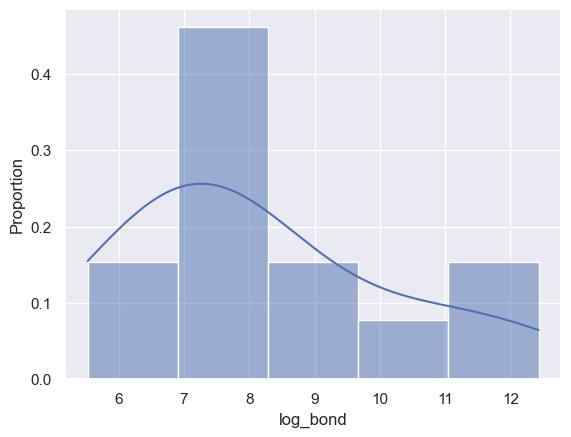

In [55]:
sns.histplot(data = bonds.loc[bonds['cl'].str.contains('Felony M') == True,'log_bond'],
             kde = True,
             stat = 'proportion')

In [ ]:
sns.histplot(data = bonds.loc[bonds['class_0'] == 'Felony C','log_bond'],
             ax = axs[3],
             kde = True,
             stat = 'proportion')

sns.histplot(data = bonds.loc[bonds['class_0'] == 'Felony D','log_bond'],
             ax = axs[4],
             kde = True,
             stat = 'proportion')

sns.histplot(data = bonds.loc[bonds['class_0'] == 'Felony E','log_bond'],
             ax = axs[5],
             kde = True,
             stat = 'proportion')

sns.histplot(data = bonds.loc[bonds['class_0'] == 'Misdemeanor A','log_bond'],
             ax = axs[6],
             kde = True,
             stat = 'proportion')

sns.histplot(data = bonds.loc[bonds['class_0'] == 'Misdemeanor B','log_bond'],
             ax = axs[6],
             kde = True,
             stat = 'proportion')

sns.histplot(data = bonds.loc[bonds['class_0'] == 'Misdemeanor C','log_bond'],
             ax = axs[6],
             kde = True,
             stat = 'proportion')

<Axes: xlabel='log_bond', ylabel='Proportion'>

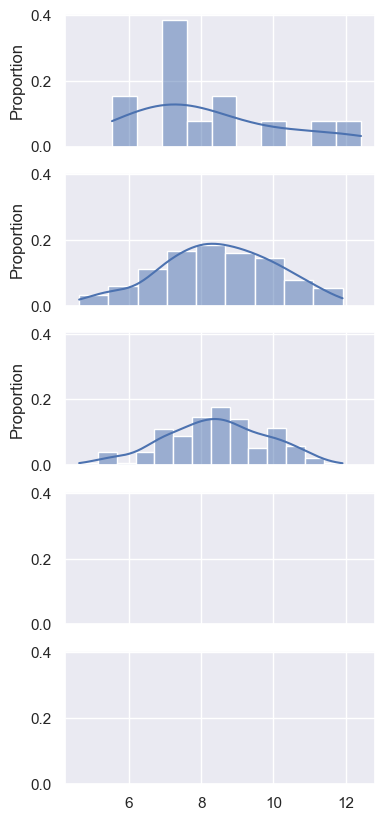

In [38]:
fig, axs = plt.subplots(5,1,figsize = (4,10), sharex = True, sharey = True)

sns.histplot(data = bonds.loc[bonds['cl'].str.contains('Felony M') == True,'log_bond'],
             ax = axs[0],
             kde = True,
             stat = 'proportion', bins = 10)

sns.histplot(data = bonds.loc[bonds['cl'].str.contains('Felony A') == True,'log_bond'],
             ax = axs[1],
             kde = True,
             stat = 'proportion')

sns.histplot(data = bonds.loc[bonds['cl'].str.contains('Felony B') == True,'log_bond'],
             ax = axs[2],
             kde = True,
             stat = 'proportion')



In [ ]:
bonds[bonds['class_0'] == 'Felony A'].describe()

In [ ]:
# log_bond or bond_amt?

sns.kdeplot(data = bonds[bonds['class_0'] == 'Felony M'],x = 'bond_amt')
sns.kdeplot(data = bonds[bonds['class_0'] == 'Felony A'],x = 'bond_amt')
sns.kdeplot(data = bonds[bonds['class_0'] == 'Felony B'],x = 'bond_amt')
sns.kdeplot(data = bonds[bonds['class_0'] == 'Felony C'],x = 'bond_amt')
sns.kdeplot(data = bonds[bonds['class_0'] == 'Felony D'],x = 'bond_amt')
sns.kdeplot(data = bonds[bonds['class_0'] == 'Felony E'],x = 'bond_amt')
plt.legend(['Felony M','Felony A','Felony B','Felony C','Felony D','Felony E'])
plt.xlim(0,30000)

(0.0, 30000.0)

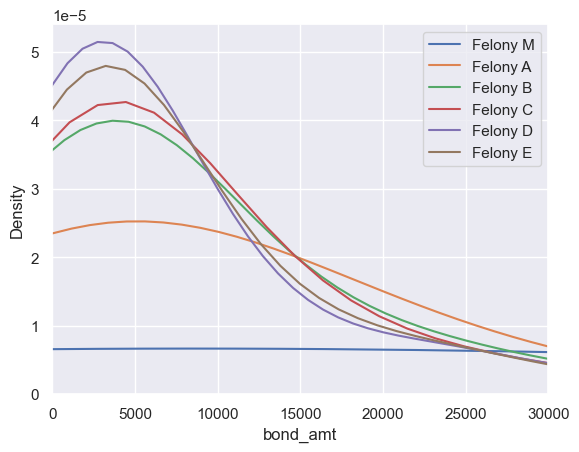

In [33]:
sns.kdeplot(data = bonds[bonds['class_0'] == 'Felony M'],x = 'bond_amt')
sns.kdeplot(data = bonds[bonds['class_0'] == 'Felony A'],x = 'bond_amt')
sns.kdeplot(data = bonds[bonds['class_0'] == 'Felony B'],x = 'bond_amt')
sns.kdeplot(data = bonds[bonds['class_0'] == 'Felony C'],x = 'bond_amt')
sns.kdeplot(data = bonds[bonds['class_0'] == 'Felony D'],x = 'bond_amt')
sns.kdeplot(data = bonds[bonds['class_0'] == 'Felony E'],x = 'bond_amt')
plt.legend(['Felony M','Felony A','Felony B','Felony C','Felony D','Felony E'])
plt.xlim(0,30000)

In [29]:
np.exp(9)

8103.083927575384

In [56]:
bonds.to_csv('bonds.csv',index=False)